
Attention, all aspiring Python learners and coding clinicians! Welcome to our Python Quiz (Level - Advanced).

Prereq: you need a Google account

Step 1. Download the sample image from: https://drive.google.com/file/d/1zQWqchhH5tqZz2lwdAlJFONCvVvWKnDY/view?usp=sharing

Step 2. Upload the sample image, "cat_dog.jpg" into the panel on the left

**Important:** the packages below are ALL you need to complete the exercises. You'll be asked to use these packages, but you can of course add whatever you deem necessary. What differentiates a **beginning programmer vs. an experienced programmer**, is the ability to Google problems and error messages effectively. If you don't know how to do something, **just Google it**, read the documentation of the packages, and see if you know what needs to happen and how it happens.

Only once you're an experienced programmer, you can use tools like ChatGPT to accelerate your development. However, we do NOT recommend using ChatGPT if you haven't mastered programming itself, otherwise you will not be able to detect subtle (but devastating!) mistakes that are being made in the code.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
from PIL import Image
import sklearn
import cv2 # opencv
# special function to show images when using opencv
from google.colab.patches import cv2_imshow
import numpy as np

# **Exercise 1**

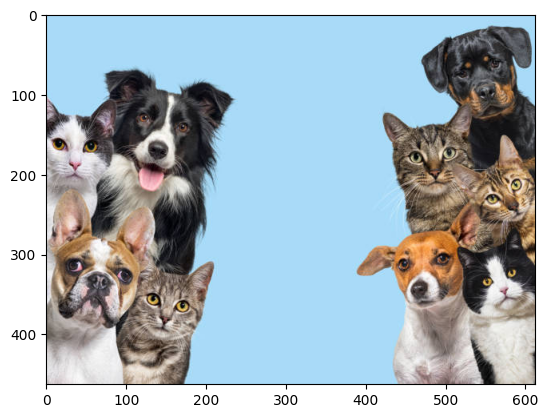

In [ ]:
# Load the image and show it
img = Image.open('cat_dog.jpg')
plt.imshow(img)

In [ ]:
# Crop the image so you have 2 groups of animals - 1 cat and 1 dog
img_array = np.array(img)
print(img_array.shape)
animal_a = img_array[70:230, 80:230, :]
animal_b = img_array[280:400, 520:, :]

(463, 612, 3)


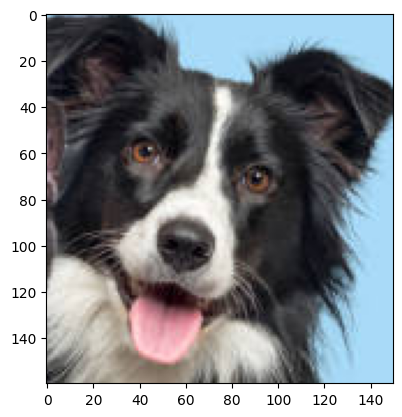

In [ ]:
# Visualize so you know you have the correct crop for the dog
plt.imshow(animal_a)

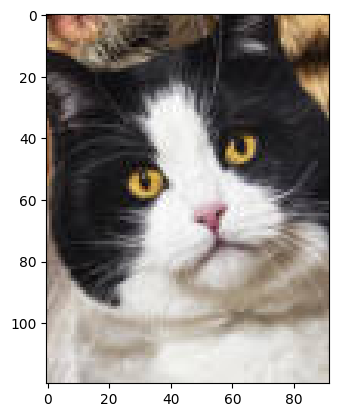

In [ ]:
# Visualize so you know you have the correct crop for the cat
plt.imshow(animal_b)

In [ ]:
# Save the cat and dog image as two new files
Image.fromarray(animal_a).save('animal_b_crop.jpg')
Image.fromarray(animal_b).save('animal_a_crop.jpg')

# **Exercise 2**

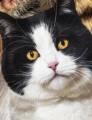

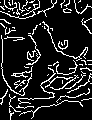

In [ ]:
# Read image and show it using cv2_imshow
image_a = cv2.imread('animal_a_crop.jpg')
cv2_imshow(image_a)

# Optionally, convert the colored image from RGB to grayscale
# and blur the image. This is computationally more efficient.
gray_a = cv2.cvtColor(image_a, cv2.COLOR_BGR2GRAY)
blurred_a = cv2.GaussianBlur(gray_a, (5, 5), 0)

# Perform Edge Detection (using Canny edge detection) and show the image
edges_a = cv2.Canny(blurred_a, threshold1=30, threshold2=100)  # You can adjust these thresholds as needed
cv2_imshow(edges_a)

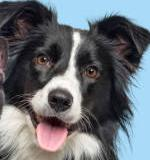

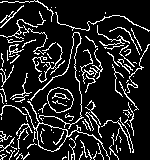

In [ ]:
# Read image and show it using cv2_imshow
image_b = cv2.imread('animal_b_crop.jpg')
cv2_imshow(image_b)

# Optionally, convert the colored image from RGB to grayscale
# and blur the image. This is computationally more efficient.
gray_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)
blurred_b = cv2.GaussianBlur(gray_b, (5, 5), 0)

# Perform Edge Detection (using Canny edge detection) and show the image
edges_b = cv2.Canny(blurred_b, threshold1=30, threshold2=100)  # You can adjust these thresholds as needed
cv2_imshow(edges_b)

# **Exercise 3**

In [ ]:
# calculate the number of contours in the image containing the edges (black/white) for both images
# and print the length of the array to find how many edges are found
contours_a, _ = cv2.findContours(edges_a.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours_a))

contours_b, _ = cv2.findContours(edges_b.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours_b))

67
104


In [ ]:
# repeat the above steps, cropping the dogs and cats and calculating the edges
# for each of the animals

In [ ]:
# Is there a numerical difference between the number of edges in cats vs. dogs?
# Plot a scatterplot and color the points based on their label (cat or dog)
# Do you see a certain pattern?

# Bonus: Exercise 4

Vanilla MLP classifier on MNIST

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 224 * 224  # Input image size after resizing
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./sample_data', train=True, transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
]), download=True)

test_dataset = torchvision.datasets.MNIST(root='./sample_data', train=False, transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
]))

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = MLP(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    loop = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)
    for i, (images, labels) in loop:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Test the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy after epoch {epoch+1}: {100 * correct / total:.2f}%")

    # Switch back to training mode
    model.train()

  0%|          | 0/600 [00:00<?, ?it/s]

Accuracy after epoch 1: 95.79%


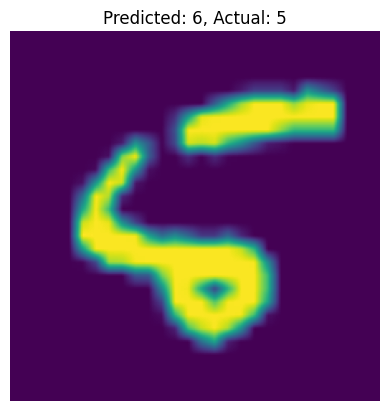

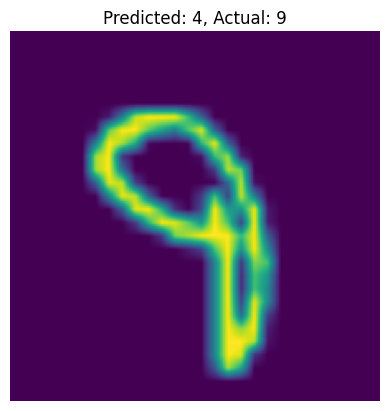

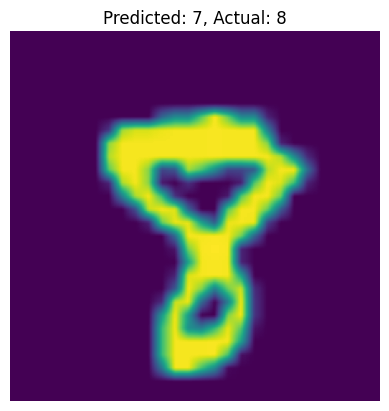

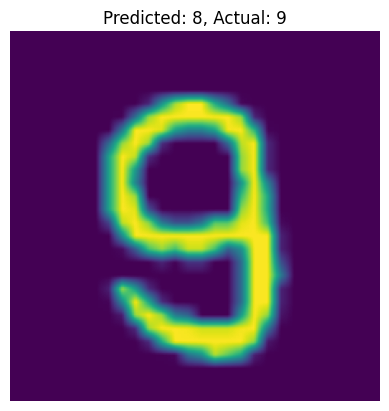

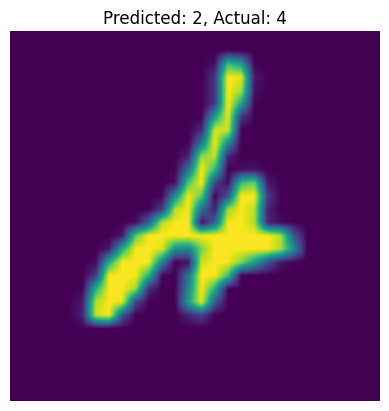

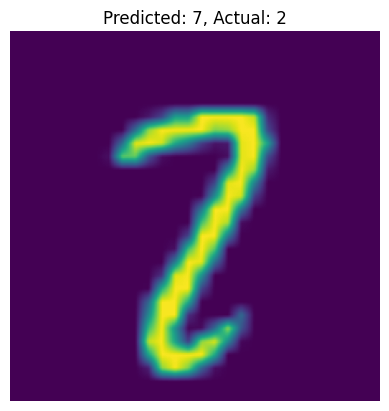

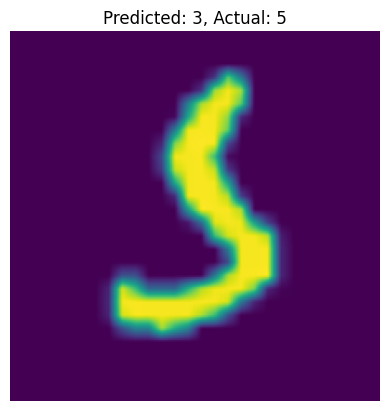

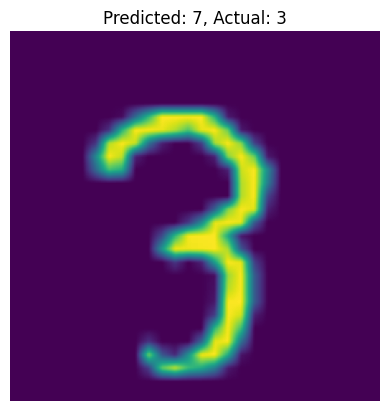

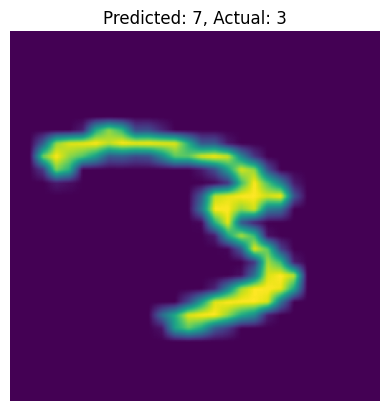

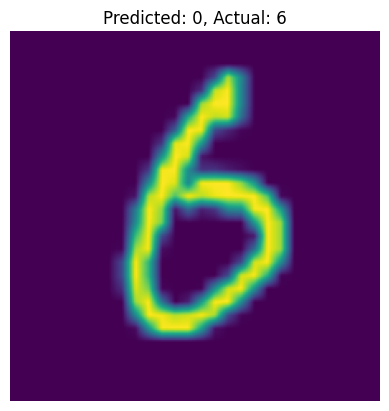

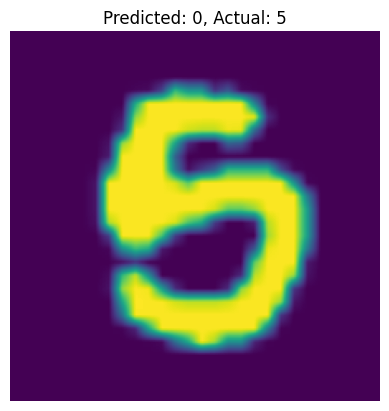

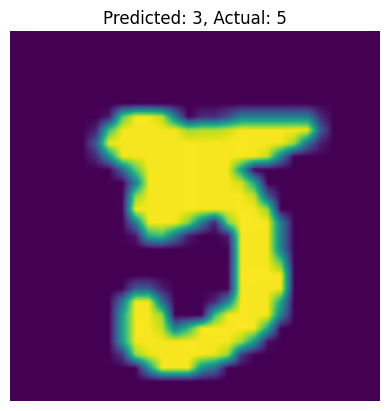

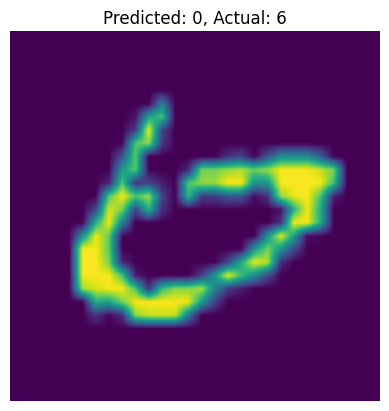

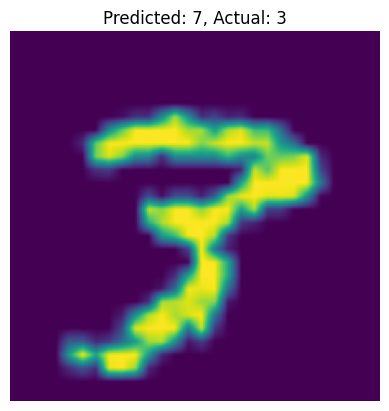

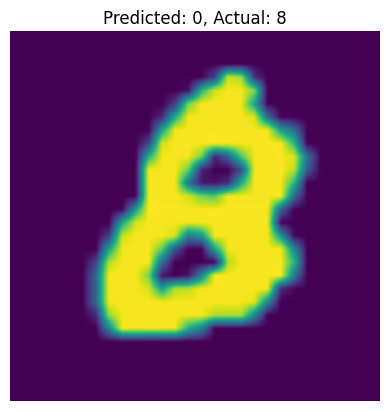

KeyboardInterrupt: 

In [ ]:
# Function to display images along with predictions
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Test the model on a few images
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images.reshape(-1, 224 * 224))  # Reshape images to match the input size
        _, predicted = torch.max(outputs, 1)

        # Display the images and predictions of misclassifications
        for i in range(len(images)):
            if predicted[i] != labels[i]:
              imshow(images[i].cpu(), title=f'Predicted: {predicted[i]}, Actual: {labels[i]}')

